# Boston Housing Prices

### Introduction

### Project Plan

- Describe the dataset, and investigate the summary statistics for each category (column).
- Identify correlation between different categories by graphing the data. This process will involve a considerable amount of trial and error. I plan to use sns.pairplot to compare categories. 
- Verify that there is correlation between categories identified by graphing, and analyse the relationship between those categories. 
- Analysis and prediction of house prices based on different factors.


### Libraries

In [8]:
import numpy as np # For numerical calculations
import matplotlib.pyplot as plt #For graphical representations
import seaborn as sns #For graphical representations
import pandas as pd #For data manipulation
import scipy.stats as ss # For calculating skew
%matplotlib inline

### The Dataset

The Boston data frame has 506 rows and 14 columns. This data frame contains the following columns:

- **crim:** per capita crime rate by town.
- **zn:** proportion of residential land zoned for lots over 25,000 sq.ft.
- **indus:** proportion of non-retail business acres per town.
- **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **nox:** nitrogen oxides concentration (parts per 10 million).
- **rm:** average number of rooms per dwelling.
- **age:** proportion of owner-occupied units built prior to 1940.
- **dis:** weighted mean of distances to five Boston employment centres.
- **rad:** index of accessibility to radial highways.

- **tax:** full-value property-tax rate per \$10000 dollars.
- **ptratio:** pupil-teacher ratio by town.
- **black:** $1000(Bk - 0.63)^{2}$ where Bk is the proportion of blacks by town.
- **lstat:** lower status of the population (percent).
- **medv:** median value of owner-occupied homes in \$1000s.

In [127]:
df = pd.read_csv('data/houses.csv')
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


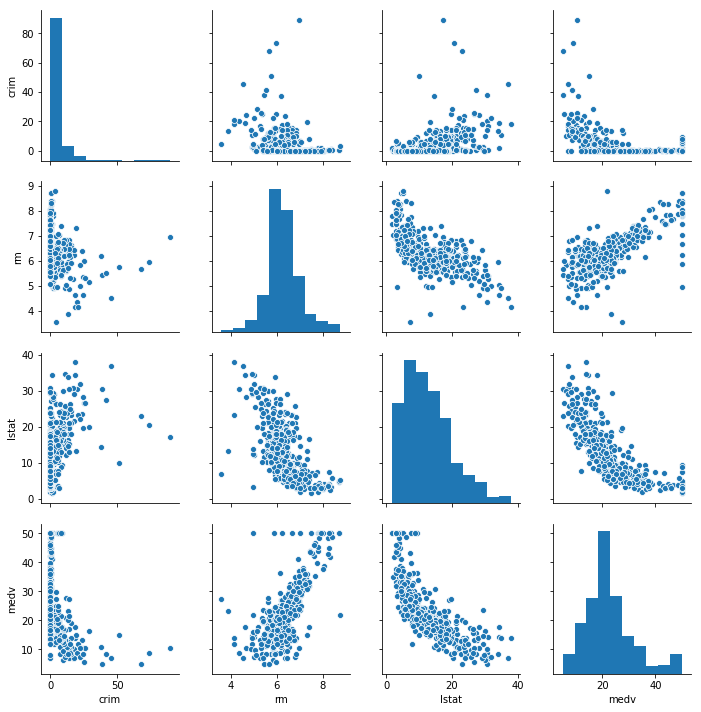

In [132]:
sns.pairplot(df[['crim', 'rm', 'lstat', 'medv']]);

## What adds value to your home?

In [126]:
value = df['medv']*1000
value.describe()

count      506.000000
mean     22532.806324
std       9197.104087
min       5000.000000
25%      17025.000000
50%      21200.000000
75%      25000.000000
max      50000.000000
Name: medv, dtype: float64

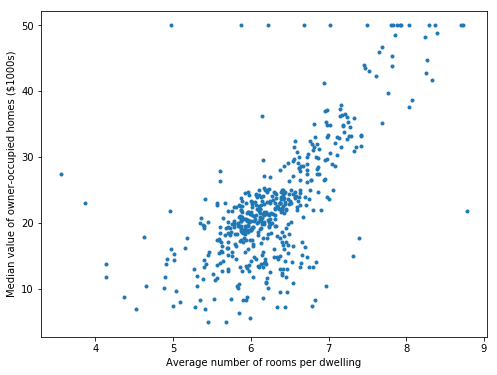

In [94]:
plt.figure(figsize = (8, 6))
plt.plot(df['rm'], df['medv'], '.')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes ($1000s)');

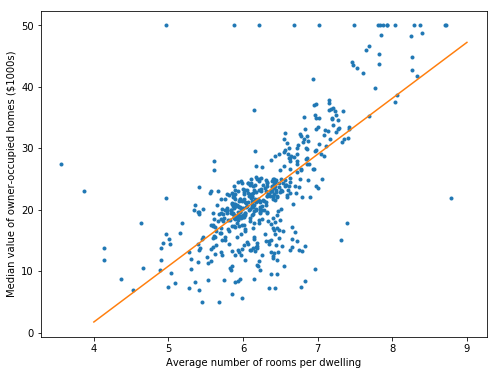

In [124]:
plt.figure(figsize = (8, 6))
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes ($1000s)');

[m,c] = np.polyfit(df['rm'], df['medv'], 1)
x = np.arange(4, 10)
y = m*x +c
plt.plot(df['rm'], df['medv'], '.')
plt.plot(x, y);

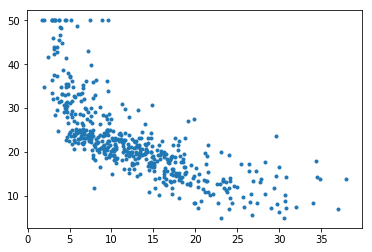

In [79]:
plt.plot(df['lstat'], df['medv'], '.');

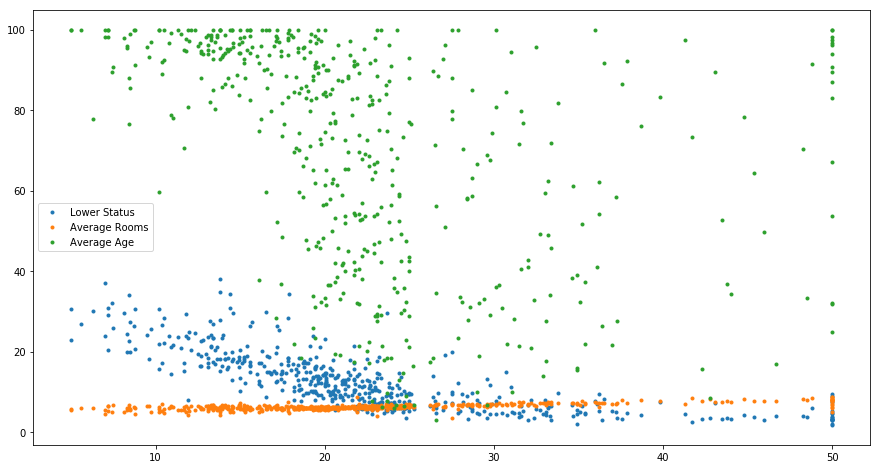

In [114]:
plt.figure(figsize = (15, 8))
x = df['medv']
y = df[['lstat', 'rm', 'age']]
plt.plot(x, y, '.')
plt.legend(['Lower Status', 'Average Rooms', 'Average Age']);

## What influences crime?

In [65]:
crime = df['crim']

In [66]:
crime.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677082
max       88.976200
Name: crim, dtype: float64

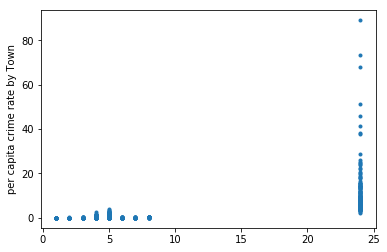

In [77]:
plt.plot(df['rad'], df['crim'], '.')
plt.ylabel('per capita crime rate by Town');

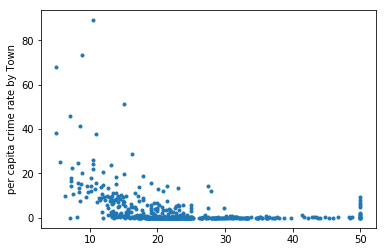

In [73]:
plt.plot(df['medv'], df['crim'], '.')
plt.ylabel('per capita crime rate by Town');

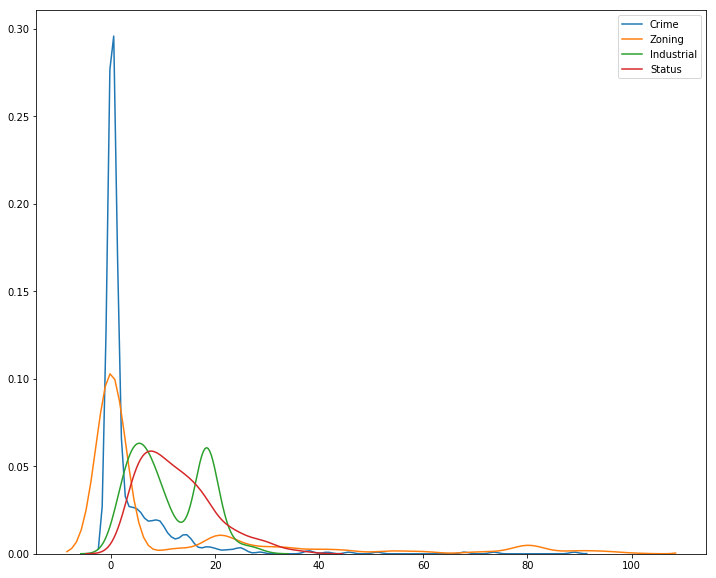

In [5]:

f, ax = plt.subplots(figsize = (12, 10))
ax = sns.distplot(df['crim'], ax=ax,
             hist=False, label ='Crime');

sns.distplot(df['zn'], ax=ax,
             hist=False, label ='Zoning');
sns.distplot(df['indus'], ax=ax,
             hist=False, label ='Industrial');
sns.distplot(df['lstat'], ax=ax,
             hist=False, label ='Status');
ax.legend()
ax.set_xlabel(None);

## Other investigations

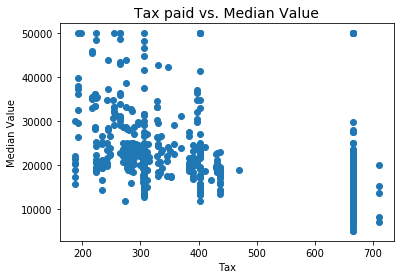

In [61]:
tax = df['tax']
value = df['medv']*1000
plt.title('Tax paid vs. Median Value', fontsize = 14)
plt.xlabel('Tax')
plt.ylabel('Median Value')
plt.scatter(tax, value);